# NLP model that generates text based on J.K. Rowling's Harry Potter Books

### The model relies on predicting characters and uses a combination of Embedding, GRU, and Dense Layers

In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, GRU, Dense
from sklearn.model_selection import train_test_split

# Preparation of Data

In [2]:
text= open('dataset.txt', 'rb').read().decode(encoding='utf-8')

In [3]:
text

'HARRY POTTER AND THE GOBLET OF FIRE\n\nCHAPTER ONE - THE RIDDLE HOUSE\n\n\tThe villagers of Little Hangleron still called it "the Riddle House," even though it had been many years since the Riddle family had lived there.  It stood on a hill overlooking the village, some of its windows boarded, tiles missing from its roof, and ivy spreading unchecked over its face.  Once a fine-looking manor, and easily the largest and grandest building for miles around, the Riddle House was now damp, derelict, and unoccupied.\n\tThe Little Hagletons all agreed that the old house was "creepy."  Half a century ago, something strange and horrible had happened there, something that the older inhabitants of the village still liked to discuss when topics for gossip were scarce.  The story had been picked over so many times, and had been embroidered in so many places, that nobody was quite sure what the truth was anymore.  Every version of the tale, however, started in the same place:  Fifty years before, at

# Preprocessing

In [4]:
def preprocessor(text):
    text= text.lower()
    text=re.sub('(#|@)\w*','', text)
    text=re.sub('https?\/\/\S+', '',text)
    text=re.sub('(\|!)+', '',text)
    text=re.sub('\s\d+\s', '', text)
    text=re.sub('(\|\,)+', '',text)
    text=re.sub('^\s+', '', text)
    text=re.sub('\s+$', '', text)
    
    text=re.sub(r'([.?])',r' \1 ', text)
    
    return text

In [5]:
#new_text=[]
#for x in text:
   # x = " ".join([str(item) for item in x])
    #new_text.append(x)

In [6]:
#new_text

# Tokenization

In [9]:
sliced_text = list(text)
sliced_text

['H',
 'A',
 'R',
 'R',
 'Y',
 ' ',
 'P',
 'O',
 'T',
 'T',
 'E',
 'R',
 ' ',
 'A',
 'N',
 'D',
 ' ',
 'T',
 'H',
 'E',
 ' ',
 'G',
 'O',
 'B',
 'L',
 'E',
 'T',
 ' ',
 'O',
 'F',
 ' ',
 'F',
 'I',
 'R',
 'E',
 '\n',
 '\n',
 'C',
 'H',
 'A',
 'P',
 'T',
 'E',
 'R',
 ' ',
 'O',
 'N',
 'E',
 ' ',
 '-',
 ' ',
 'T',
 'H',
 'E',
 ' ',
 'R',
 'I',
 'D',
 'D',
 'L',
 'E',
 ' ',
 'H',
 'O',
 'U',
 'S',
 'E',
 '\n',
 '\n',
 '\t',
 'T',
 'h',
 'e',
 ' ',
 'v',
 'i',
 'l',
 'l',
 'a',
 'g',
 'e',
 'r',
 's',
 ' ',
 'o',
 'f',
 ' ',
 'L',
 'i',
 't',
 't',
 'l',
 'e',
 ' ',
 'H',
 'a',
 'n',
 'g',
 'l',
 'e',
 'r',
 'o',
 'n',
 ' ',
 's',
 't',
 'i',
 'l',
 'l',
 ' ',
 'c',
 'a',
 'l',
 'l',
 'e',
 'd',
 ' ',
 'i',
 't',
 ' ',
 '"',
 't',
 'h',
 'e',
 ' ',
 'R',
 'i',
 'd',
 'd',
 'l',
 'e',
 ' ',
 'H',
 'o',
 'u',
 's',
 'e',
 ',',
 '"',
 ' ',
 'e',
 'v',
 'e',
 'n',
 ' ',
 't',
 'h',
 'o',
 'u',
 'g',
 'h',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 'd',
 ' ',
 'b',
 'e',
 'e',
 'n',
 ' ',
 'm',
 'a',

In [10]:
#get all unique charcters and add unknown character
corpus = list(sorted(set(sliced_text)))
corpus = ['[UNK]'] + corpus
corpus

['[UNK]',
 '\t',
 '\n',
 ' ',
 '!',
 '"',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '6',
 '7',
 '9',
 ':',
 ';',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '^',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '}',
 'ü',
 '•']

# Indexing 

In [11]:
#encoding
#character to index
c_to_id = {c:i for i, c in enumerate(corpus)}
def char_to_id(x):
    return [c_to_id[c] for c in x]

def ids_from_chars(data):
    return np.array([char_to_id(c) for c in data])
#decoding
#index to character
id_to_c = {i:c for i, c in enumerate(corpus)}
def id_to_char(x):
    return [id_to_c[c] for c in x]

def chars_from_ids(data):
    return np.array(id_to_char(c) for c in data)
 

In [12]:
#get the indexes of every character in the text
all_ids = ids_from_chars(sliced_text)
print(all_ids)

[[31]
 [24]
 [41]
 ...
 [55]
 [11]
 [ 2]]


# Sequence Length

In [13]:
#each sequence consist of 100 charcters + output
sequence_length = 100
sequence_length += 1
#remove any other character that would not fit by floor division
sequence_num = len(all_ids) // sequence_length
num_charc_to_take = sequence_length * sequence_num
num_charc_to_take
print('Sequence Length: ', sequence_length, 'Number of characters to take:', num_charc_to_take)

101 10965


In [14]:
#take ids till number of characters specified
ids= np.array(all_ids[:num_charc_to_take])
#split the data into sequences of 101, and number of sequences of 10965
ids = np.reshape(ids,(sequence_num, sequence_length))
ids

array([[31, 24, 41, ..., 63, 56, 69],
       [66, 65,  3, ..., 59, 52, 55],
       [ 3, 63, 60, ..., 60, 65, 58],
       ...,
       [70, 70, 56, ...,  2, 31, 52],
       [69, 69, 76, ...,  3, 65, 66],
       [ 3, 67, 66, ..., 70, 52, 60]])

# Data Split into X and Y

In [15]:
#the input is the first to the second last word
#the output is the second to the last word
def split(sequences):
    x, y = [],[]
    for sequence in sequences:
        x.append(sequence[:-1])
        y.append(sequence[1:])
    return np.array(x), np.array(y)

x, y = split(ids)
x


array([[31, 24, 41, ..., 58, 63, 56],
       [66, 65,  3, ...,  3, 59, 52],
       [ 3, 63, 60, ..., 70, 60, 65],
       ...,
       [70, 70, 56, ..., 11,  2, 31],
       [69, 69, 76, ..., 70,  3, 65],
       [ 3, 67, 66, ...,  3, 70, 52]])

# Deep Learning Model

In [16]:
Epochs = 50
BATCH_SIZE = 64 #batching to accomdate for the weak processor of the computer
rnn_units = 1024 #GRU neuron
embedding_dim = 256 #learn 256 meaning for each word
vocab_size = len(corpus) #number of unique characters in the text

In [17]:
#model inheriting from Keras Model class
class MyModel(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, rnn_units):
        super().__init__(self)
        #Defining Embedding,, GRU, Densa Layers
        self.embedding = Embedding(vocab_size, embedding_dim)
        self.gru = GRU(rnn_units, return_sequences=True, return_state=True)
        self.dense = Dense(vocab_size)
        
    #first call    
    def call(self, inputs, states=None, return_state=False, training=False):
        x=inputs
        #new x is the meanings predicted by Embedding layer
        x = self.embedding(x, training=training)
        
        #GRU unit get the first state in case of first character
        if states is None:
            states = self.gru.get_initial_state(x)
            
        #GRU layer
        x, states = self.gru(x, initial_state=states, training=training)
        
        #Output layer to get predicted character
        x = self.dense(x, training=training)

        if return_state:
            return x, states
        else:
            return x

In [18]:
#Instance of model
model = MyModel(vocab_size= vocab_size, embedding_dim=embedding_dim, rnn_units=rnn_units)
model.build(input_shape=(None, 100))

In [19]:
#as this is a multiclass classification model, we use Sparse Categorical CrossEntropy and Accuracy
#from logits uses softmax as activation
losses  =tf.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',loss=losses, metrics='accuracy')

In [20]:
history = model.fit(x, y, epochs=Epochs)  

Epoch 1/20
343/343 [==============================] - 604s 2s/step - loss: 2.3563 - accuracy: 0.3566
Epoch 2/20
343/343 [==============================] - 569s 2s/step - loss: 1.5951 - accuracy: 0.5327
Epoch 3/20
343/343 [==============================] - 581s 2s/step - loss: 1.3484 - accuracy: 0.5972
Epoch 4/20
343/343 [==============================] - 600s 2s/step - loss: 1.2317 - accuracy: 0.6272
Epoch 5/20
343/343 [==============================] - 595s 2s/step - loss: 1.1561 - accuracy: 0.6470
Epoch 6/20
343/343 [==============================] - 621s 2s/step - loss: 1.0951 - accuracy: 0.6625
Epoch 7/20
343/343 [==============================] - 594s 2s/step - loss: 1.0408 - accuracy: 0.6774
Epoch 8/20
343/343 [==============================] - 597s 2s/step - loss: 0.9877 - accuracy: 0.6918
Epoch 9/20
343/343 [==============================] - 597s 2s/step - loss: 0.9368 - accuracy: 0.7058
Epoch 10/20
343/343 [==============================] - 822s 2s/step - loss: 0.8848 - accura

In [21]:
#save the parameters
model.save_weights('my_weights.hf')

# Generation

In [22]:
#there is no softmax activation in output layer
def softmax(logits):
    return np.exp(logits) / np.exp(logits).sum()


def gen_one_word(inputs, states=None):
    """Function for generating text"""
    #slice text into characters
    charac = list(inputs)
    #get ids
    ids = ids_from_chars(charac)
    
    #for UNK to make lowest probablity so not chosen (makes it -infinity)
    pred_mask = np.zeros((len(corpus)))
    pred_mask[0] = -float('inf')
    
    #prediction
    pred, states = model(inputs=ids, states=states, return_state=True)
    pred = pred.numpy()
    pred = pred[:, -1, :] #gets all prediction
    pred += pred_mask
    
    #get probabilities of each prediction
    prob = softmax(pred).flatten()
    predicted_id = np.random.choice(range(len(prob)), 1, p=prob) #choose one randomly to get more creative generation each time
    predicted_char = id_to_char(predicted_id) #get character from ids
    
    return predicted_char, states

In [23]:
def construct_sentences(sentences):
    return ["".join(sentence) for sentence in sentences]

In [24]:
states=None

start = 'Ron'
next_char = [start]
result = [start]

for n in range(10000):
    next_char, states = gen_one_word(next_char, states=states)
    #append the predicted character
    result.append(next_char[0])
    
result = construct_sentences([result])
result = result[0]

In [25]:
print(result)

Ron, "and then it came to him at all. Fleur Delacour, Ginny, a maraled of outrage the Great Hall.  Professor McGonagall explanated Moodys interrorted than ever; they were both burglers under one of these half hit the hooded clear and grabbed in the way of his care and twins.  Whatever put yeh too help, and hornbeak off to their impresented still.
Harry stared at him.
CHAPTER TWHE - THE DELEATHART
THIRRY HOURM


Dudley approached the edge of the Grouch to Dumbledore, that he was entered in the chair backward.
"Now serious, you know, oddacI over a hord of Privet Drive, Winky, that egg-O"Fabble is a bit some coming line.  He stared movimerating eggs and sacking for his face; their fifth gamekwere living out of his feet.
Then she said, "I'm not telling you, all right. Madam Pomfrey?  And it's only the Durmstrang inner proper UzGabban and Dad can't read the word . . . there's someone.  He won't be competication, and is during it coming you.. to pensure the dream ... do you think you've been

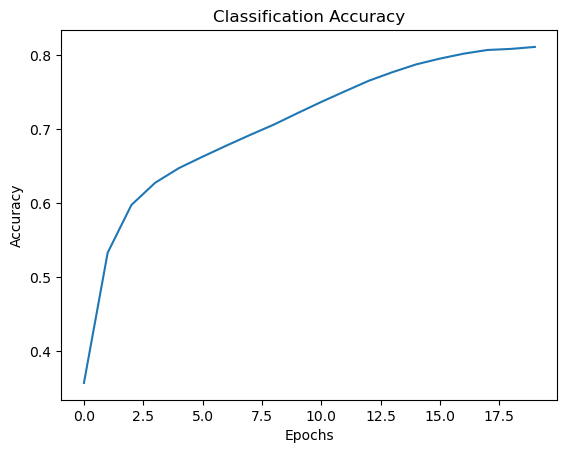

In [28]:
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()